# EDA

## Importing moduls

And configuting settings

In [152]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pandas_profiling as pp
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor, Pool
import xgboost as xgb

import category_encoders as ce

from lib.data_viz_functions import *

In [153]:
filterwarnings("ignore")
sns.set()

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

%matplotlib inline

In [154]:
train = pd.read_pickle("data/2022-04-06_train_preprocessed.pkl.zip", compression="zip")
test = pd.read_pickle("data/2022-04-06_test_preprocessed.pkl.zip", compression="zip")

## Feature description

- **body_type** - Type of vehicle body (седан, купе, хэтчбек...)  
- **brand** - Manufacture name (bmw, audi...)  
- **color** - Main car's body color  
- **description** - Seller's car description  
- **engine_displacement** - Volume of car's engine (nan if electro)  
- **engine_power** - Engine power in horse powers  
- **fuel_type** - Fuel type (diesel, gasoline, electro...)  
- **km_age** - Vehicle mileage  
- **model_year** - Year when model production was started  
- **number_of_doors** - Number of doors  
- **production_year** - Production year of this car  
- **vehicle_transmission** - Transmission type (auto, robot, mech...)  
- **vendor** - Origin country of brand (EUROPIAN, CHINEESE...)  
- **oweners** - Count of oweners of car  
- **owenership_duration** - Owenership duration  
- **ptc** - Vehicle Registration Certificate (YES, NO, DUP)  
- **drive** - Car drive (4WD, FRONT, REAR)  
- **wheel** - Wheel position in car (RIGHT, LEFT)  
- **price** - Our target column - Car Price  

### Dicts and Lists block

In [155]:
valid_columns_dict = {
    "bodyType": "body_type",
    "engineDisplacement": "engine_displacement",
    "enginePower": "engine_power",
    "fuelType": "fuel_type",
    "mileage": "km_age",
    "modelDate": "model_year",
    "numberOfDoors": "number_of_doors",
    "productionDate": "production_year",
    "vehicleTransmission": "vehicle_transmission",
    "Владельцы": "owners",
    "Владение": "ownership_duration",
    "ПТС": "ptc",
    "Привод": "drive",
    "Руль": "wheel",
}

In [156]:
def get_nans_in_percents(df):
    nans = df.isna().sum() / df.shape[0] * 100
    return nans[nans > 0]


def plot_nans_heatmap(train, test):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    sns.heatmap(train.isna(), cmap="YlGnBu", ax=ax[0], cbar=False).set_title(
        "Heatmap for train dataframe"
    )
    sns.heatmap(test.isna(), cmap="YlGnBu", ax=ax[1], cbar=False).set_title(
        "Heatmap for test dataframe"
    )
    plt.show()

### Changing columns names to english and snake-type (from dict)

In [157]:
train.rename(columns=valid_columns_dict, inplace=True)
test.rename(columns=valid_columns_dict, inplace=True)

## Grouping cols as categorical and numeric

In [158]:
cat_cols = [
    "body_type",
    "brand",
    "color",
    "fuel_type",
    "number_of_doors",
    "vehicle_transmission",
    "vendor",
    "owners",
    "ptc",
    "drive",
    "wheel",
]
nums_cols = [
    "engine_displacement",
    "engine_power",
    "km_age",
    "model_year",
    "production_year",
    "ownership_duration",
]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115367 entries, 0 to 115368
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             115367 non-null  object 
 1   brand                 115367 non-null  object 
 2   color                 115367 non-null  object 
 3   description           112155 non-null  object 
 4   engine_displacement   115209 non-null  float64
 5   engine_power          115367 non-null  float32
 6   fuel_type             115367 non-null  object 
 7   km_age                115367 non-null  float32
 8   model_year            115367 non-null  float32
 9   model_name            115367 non-null  object 
 10  number_of_doors       115367 non-null  float32
 11  production_year       115367 non-null  float32
 12  vehicle_transmission  115367 non-null  object 
 13  vendor                115367 non-null  object 
 14  owners                104832 non-null  float64
 15  

## Discovering NA

In [9]:
get_nans_in_percents(train)

description             2.784158
engine_displacement     0.136954
owners                  9.131727
ownership_duration     69.767785
ptc                     0.301646
dtype: float64

In [10]:
get_nans_in_percents(test)

engine_displacement     0.158565
ownership_duration     65.418324
ptc                     0.002883
dtype: float64

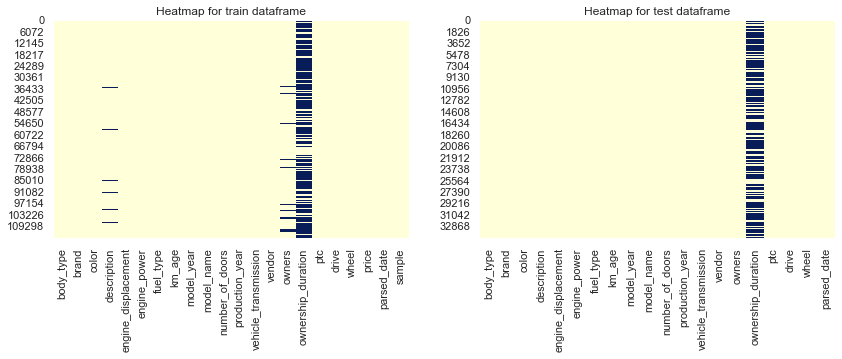

In [11]:
plot_nans_heatmap(train, test)

In [31]:
train.loc[train.km_age.isna()]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


In [13]:
train.dropna(subset=["km_age"], inplace=True)

## Numeric variables overview

In [14]:
describe_nums(train[nums_cols + ["price"]])

,unique,n/a count,count,mean,std,min,25%,50%,75%,max
km_age,28798,0,115367.000000,140256.546875,99727.398438,0.000000,69208.000000,133000.000000,196821.500000,1000000.000000
price,10660,0,115367.000000,1373094.201236,1908124.369307,16000.000000,391500.000000,750000.000000,1637000.000000,99000000.000000
ownership_duration,536,80489,34878.000000,1680.112076,1309.229959,0.000000,701.000000,1305.000000,2404.000000,15615.000000
engine_power,406,0,115367.000000,176.565292,85.571007,11.000000,117.000000,150.000000,211.000000,800.000000
production_year,81,0,115367.000000,2010.820312,6.889666,1904.000000,2007.000000,2012.000000,2016.000000,2021.000000
model_year,80,0,115367.000000,2008.596069,7.258581,1904.000000,2005.000000,2010.000000,2014.000000,2021.000000
engine_displacement,67,158,115209.000000,2.257130,0.913561,0.700000,1.600000,2.000000,2.500000,8.400000


Unique values count: 67 
Q1: 1.600000023841858
Q3: 2.5
IQR: 0.8999999761581421 
Outliers borders: [0.2500000596046448, 3.849999964237213]


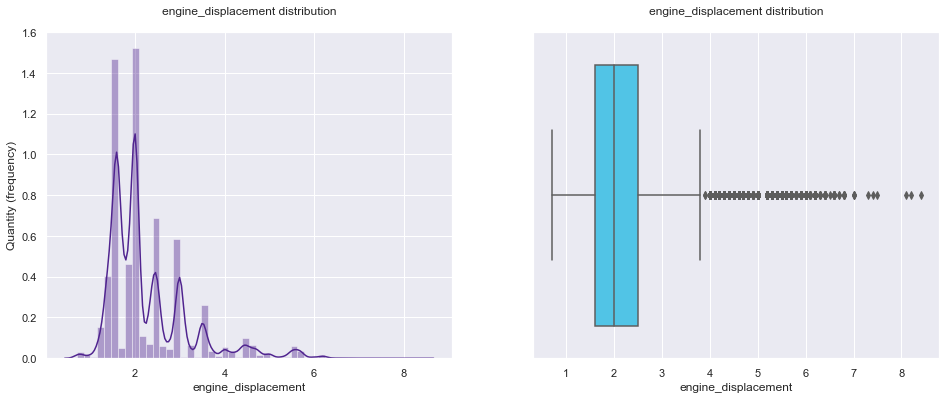

Unique values count: 406 
Q1: 117.0
Q3: 211.0
IQR: 94.0 
Outliers borders: [-24.0, 352.0]


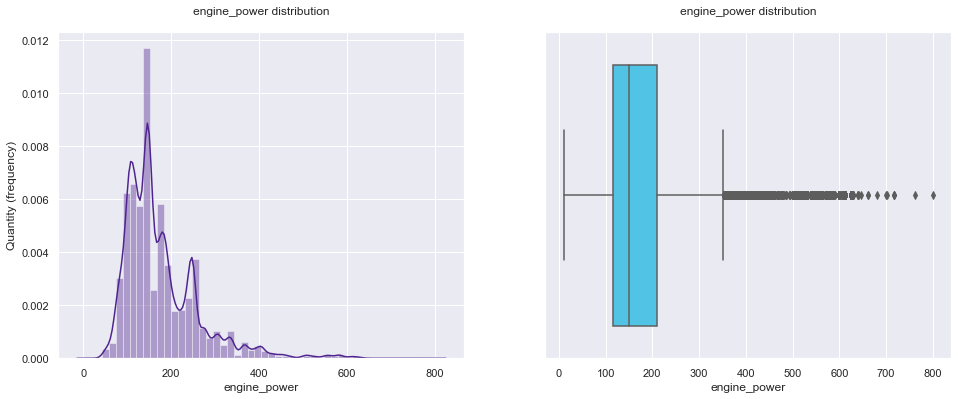

Unique values count: 28798 
Q1: 69208.0
Q3: 196821.5
IQR: 127613.5 
Outliers borders: [-122212.25, 388241.75]


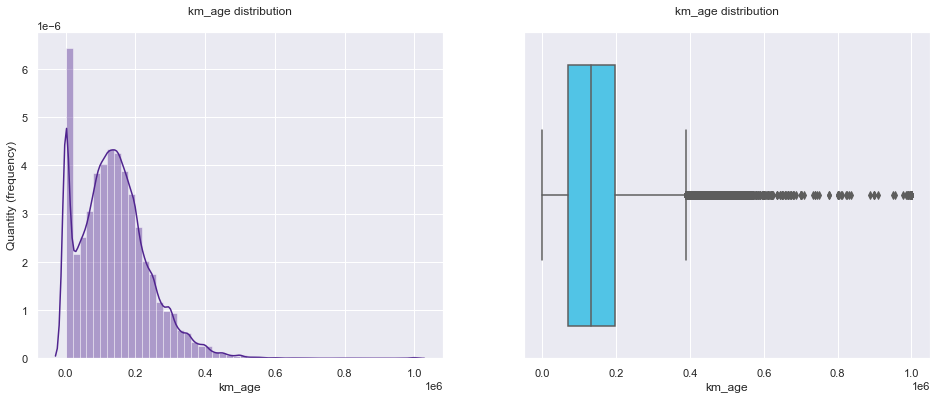

Unique values count: 80 
Q1: 2005.0
Q3: 2014.0
IQR: 9.0 
Outliers borders: [1991.5, 2027.5]


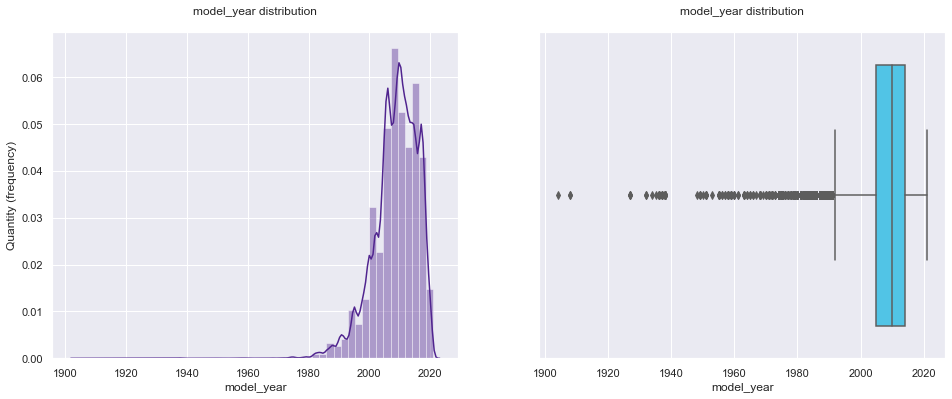

Unique values count: 81 
Q1: 2007.0
Q3: 2016.0
IQR: 9.0 
Outliers borders: [1993.5, 2029.5]


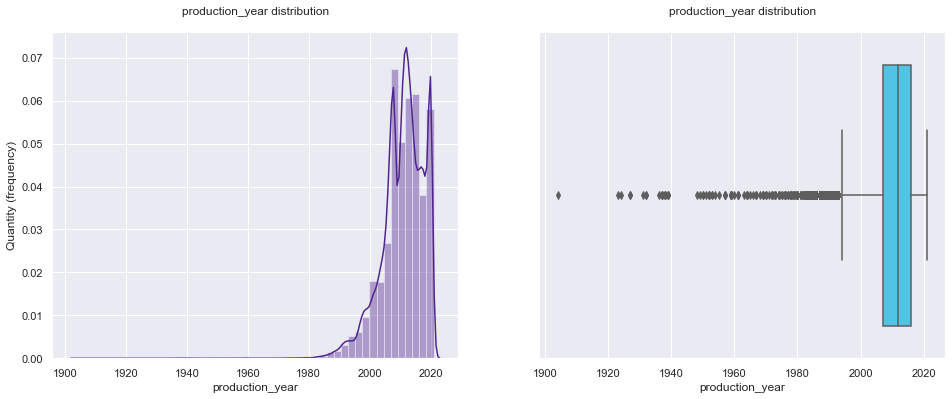

Unique values count: 536 
Q1: 701.0
Q3: 2404.0
IQR: 1703.0 
Outliers borders: [-1853.5, 4958.5]


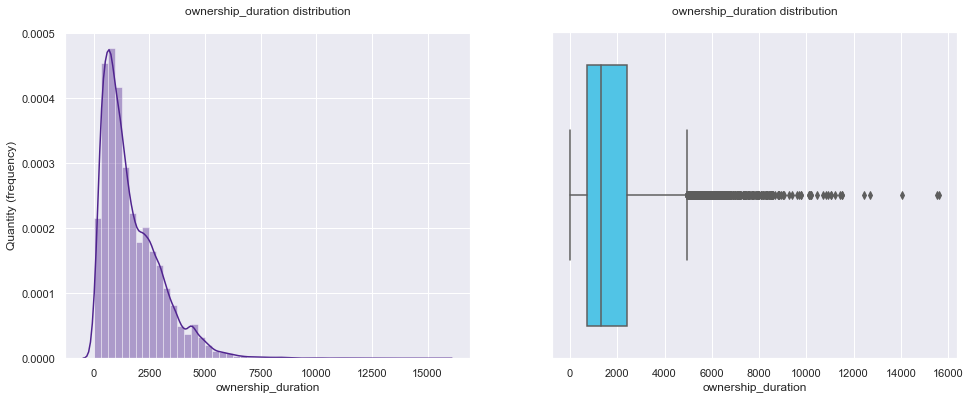

In [15]:
for c in nums_cols:
    show_IQR(train[c])

In [16]:
# for c in nums_cols:
#     show_IQR(test[c])

Unique values count: 35 
Q1: 2.0
Q3: 3.0
IQR: 1.0 
Outliers borders: [0.5, 4.5]


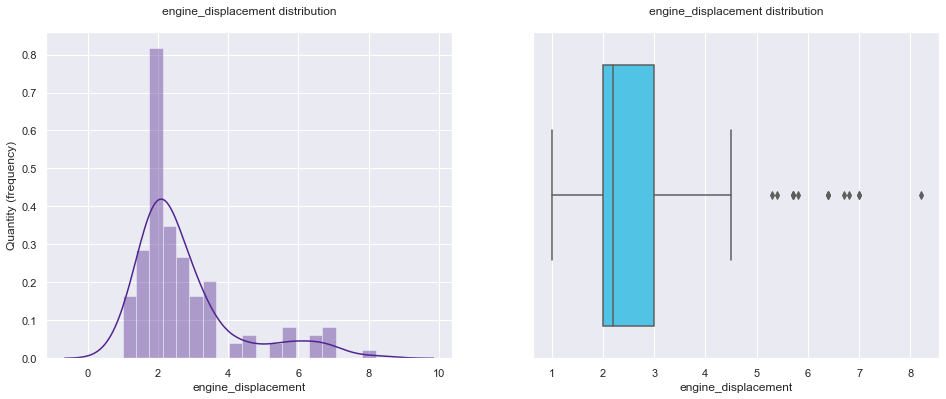

Unique values count: 62 
Q1: 55.0
Q3: 150.0
IQR: 95.0 
Outliers borders: [-87.5, 292.5]


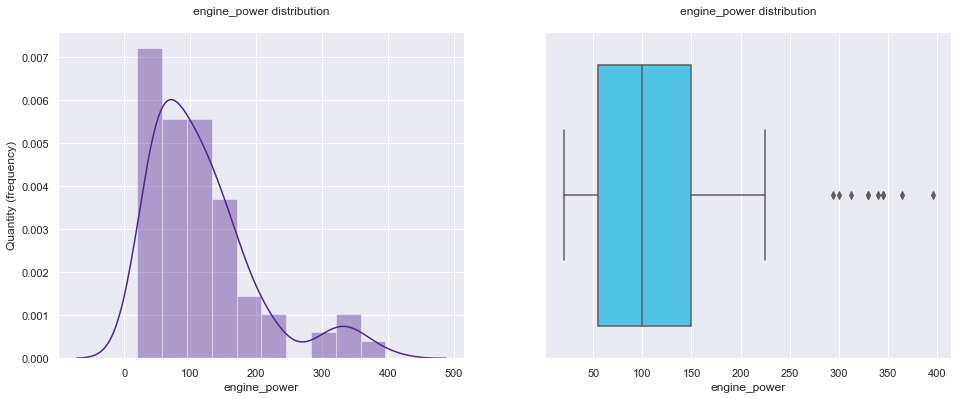

Unique values count: 89 
Q1: 27000.0
Q3: 150000.0
IQR: 123000.0 
Outliers borders: [-157500.0, 334500.0]


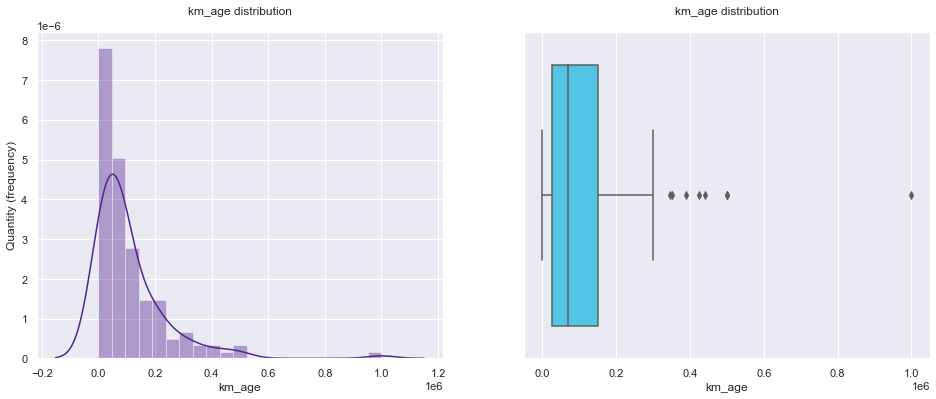

Unique values count: 37 
Q1: 1949.0
Q3: 1972.0
IQR: 23.0 
Outliers borders: [1914.5, 2006.5]


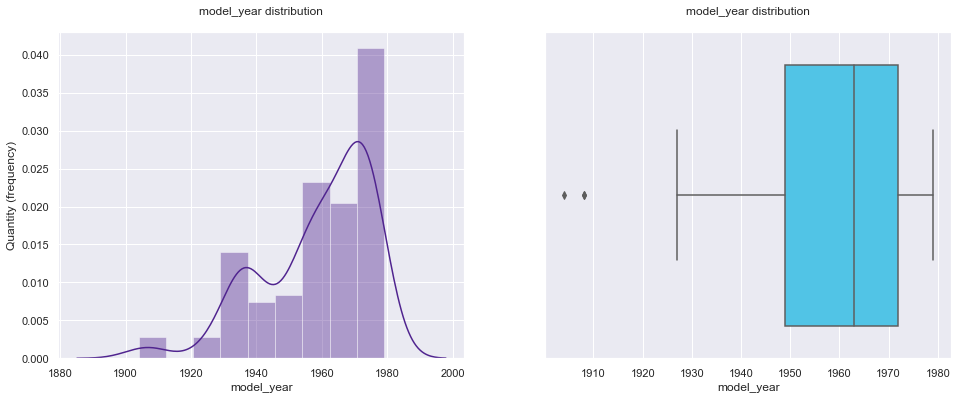

Unique values count: 39 
Q1: 1955.0
Q3: 1976.0
IQR: 21.0 
Outliers borders: [1923.5, 2007.5]


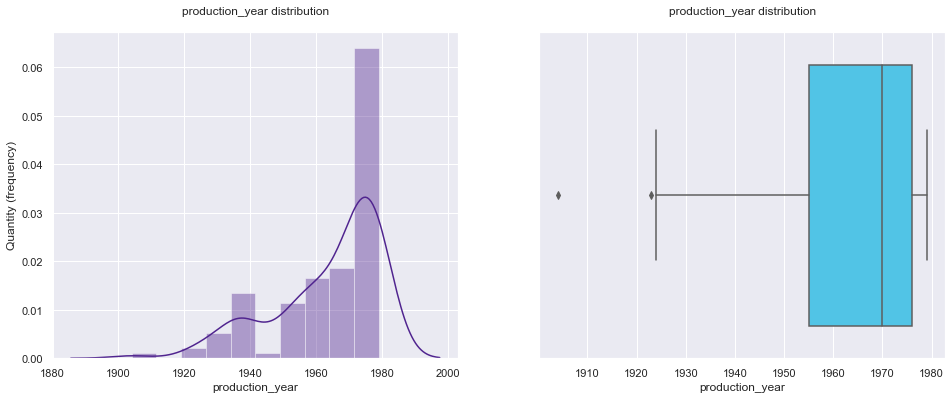

Unique values count: 52 
Q1: 1782.0
Q3: 5692.5
IQR: 3910.5 
Outliers borders: [-4083.75, 11558.25]


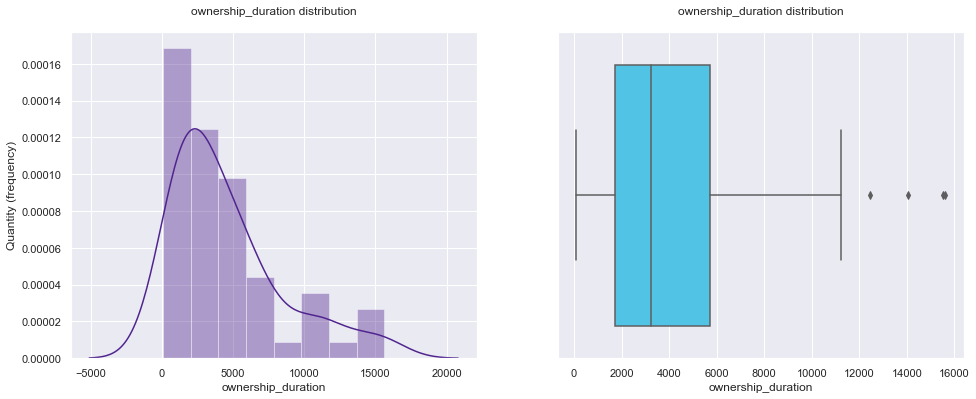

In [17]:
for c in nums_cols:
    show_IQR(train[train["production_year"] < 1980][c])

## Categorical columns overview

In [18]:
train.describe(include="object").T

,count,unique,top,freq
body_type,115367,16,внедорожник,44065
brand,115367,36,MERCEDES,10080
color,115367,16,чёрный,32686
description,112155,103308,рольф северо запад это первый мегамолл автомоб...,244
fuel_type,115367,5,бензин,96259
model_name,115367,1166,OCTAVIA,2545
vehicle_transmission,115367,4,AUTOMATIC,64367
vendor,115367,5,EUROPEAN,56641
ptc,115019,2,Оригинал,100643
drive,115367,3,передний,58265


In [19]:
train["owners"].astype("object").describe()

count     104832.0
unique         3.0
top            3.0
freq       48461.0
Name: owners, dtype: float64

In [20]:
train[cat_cols].describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
number_of_doors,115367.0,4.525939,0.654002,0.0,4.0,5.0,5.0,5.0
owners,104832.0,2.192165,0.833943,1.0,1.0,2.0,3.0,3.0


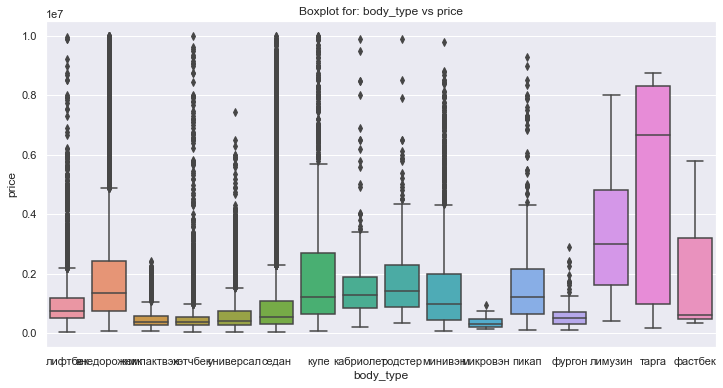

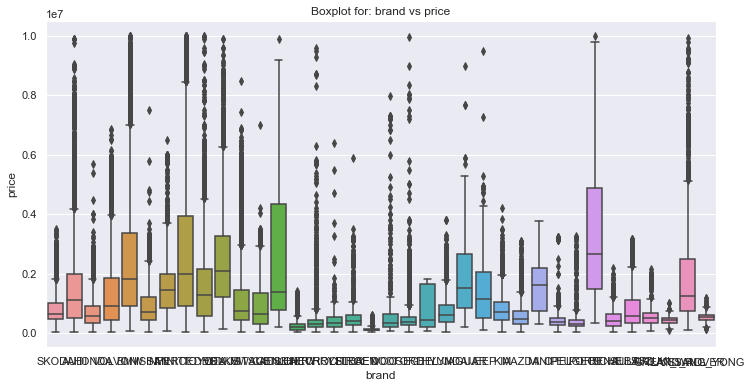

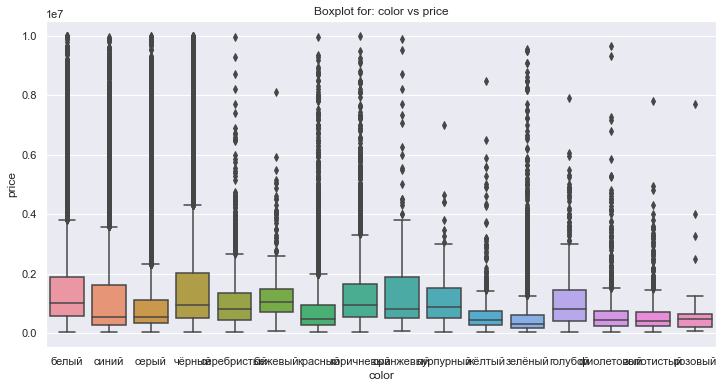

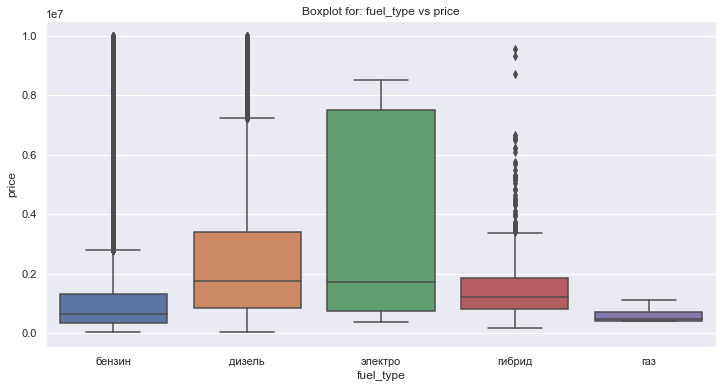

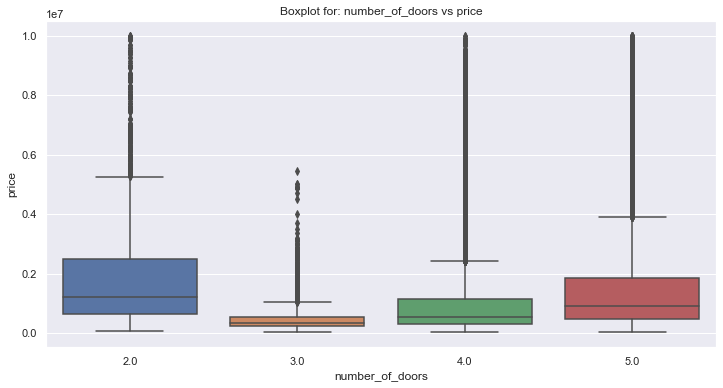

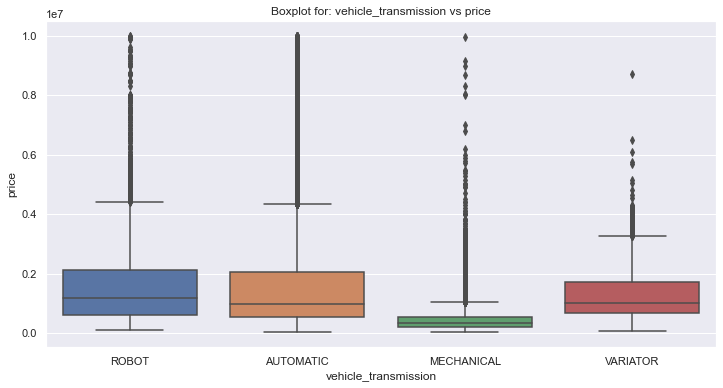

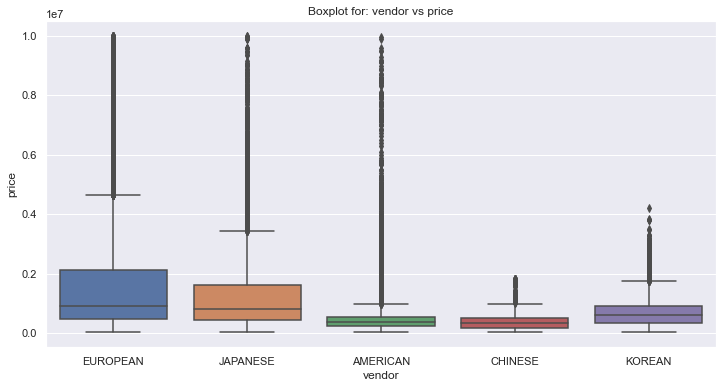

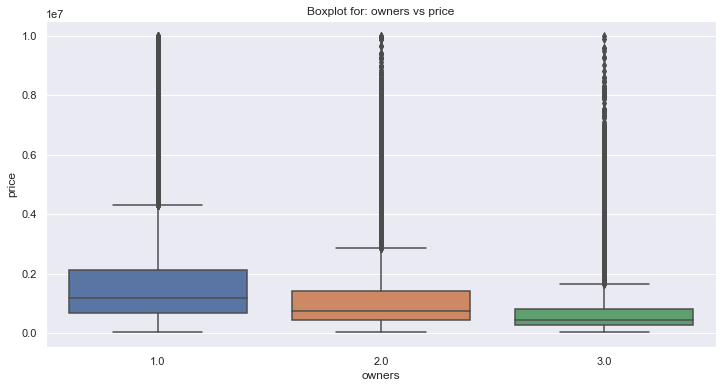

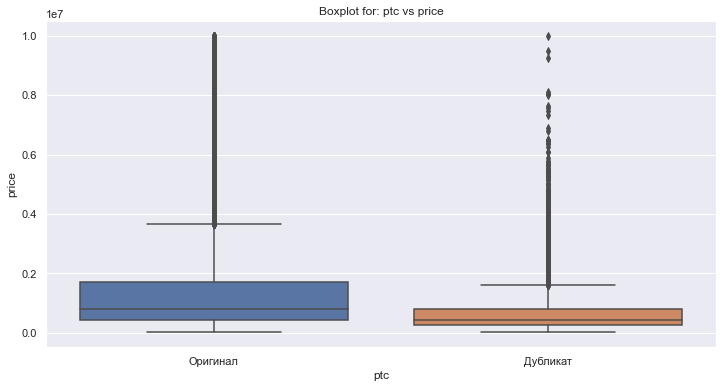

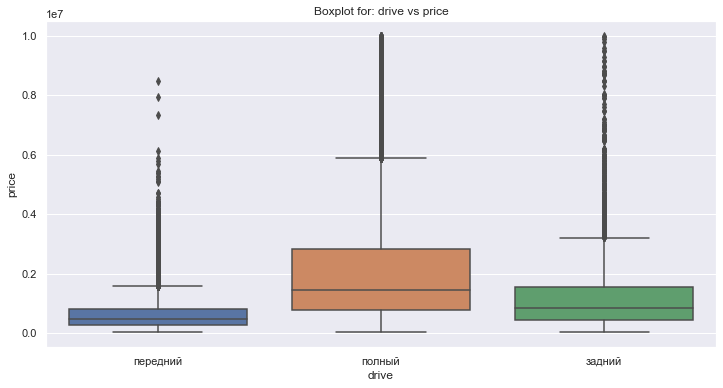

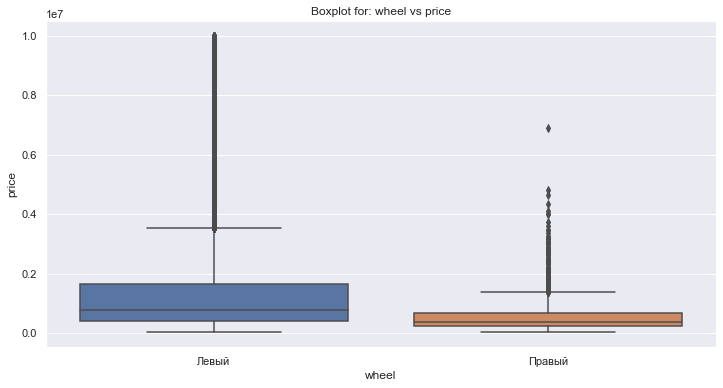

In [21]:
for c in cat_cols:
    show_boxplots(train.query("price < 10_000_000"), c, "price")

## Automated EDA

In [22]:
comp = sv.compare(train, test)

                                             |                                             | [  0%]   00:00 ->…


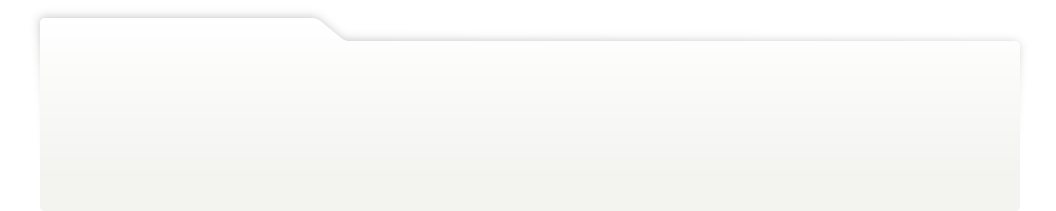
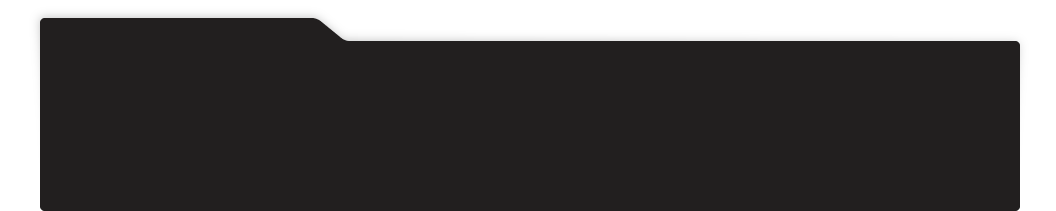
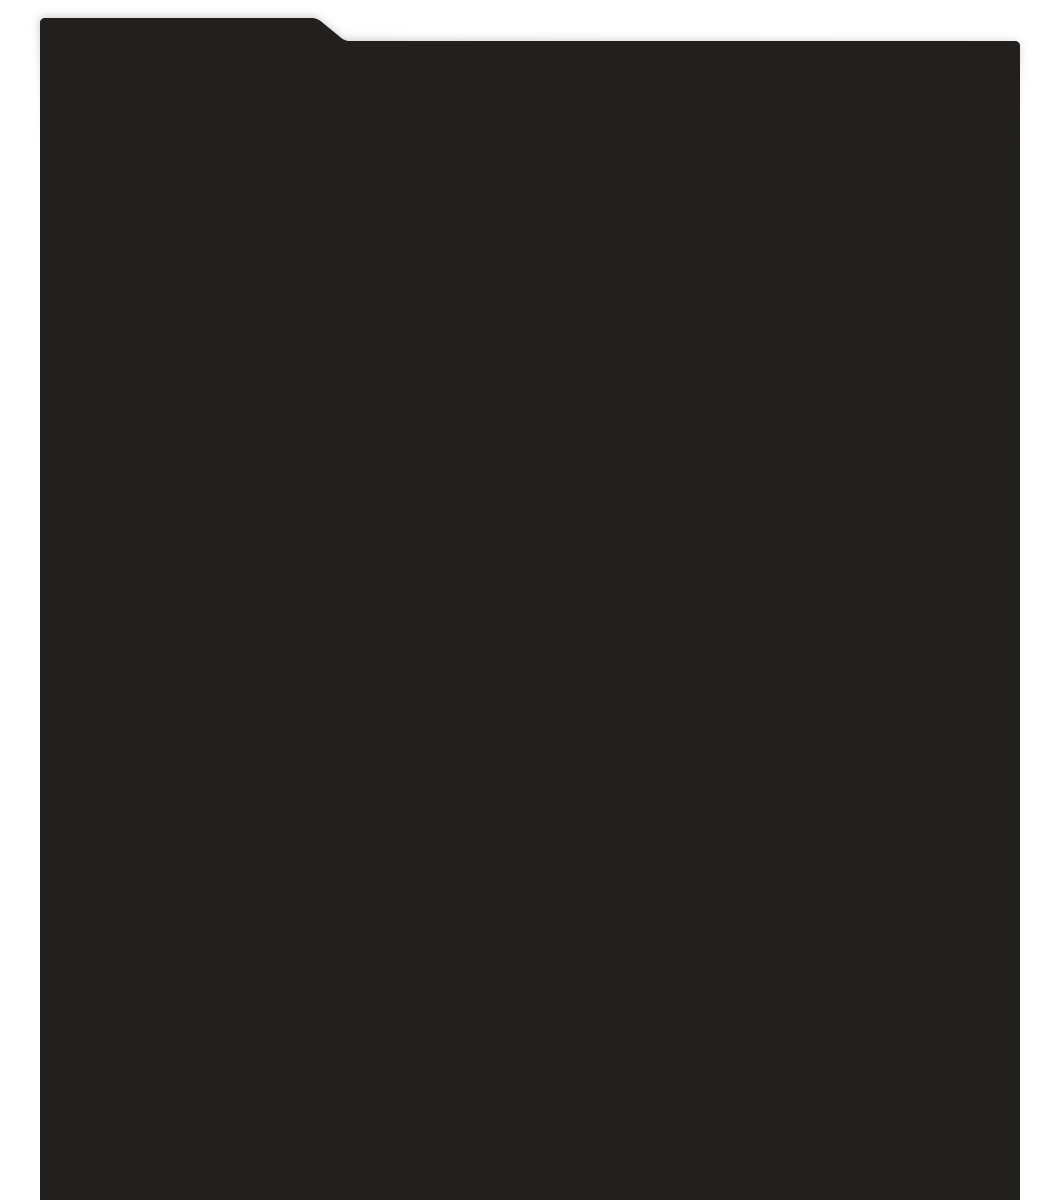
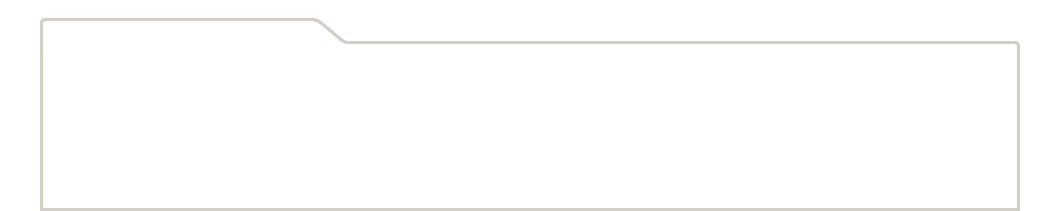
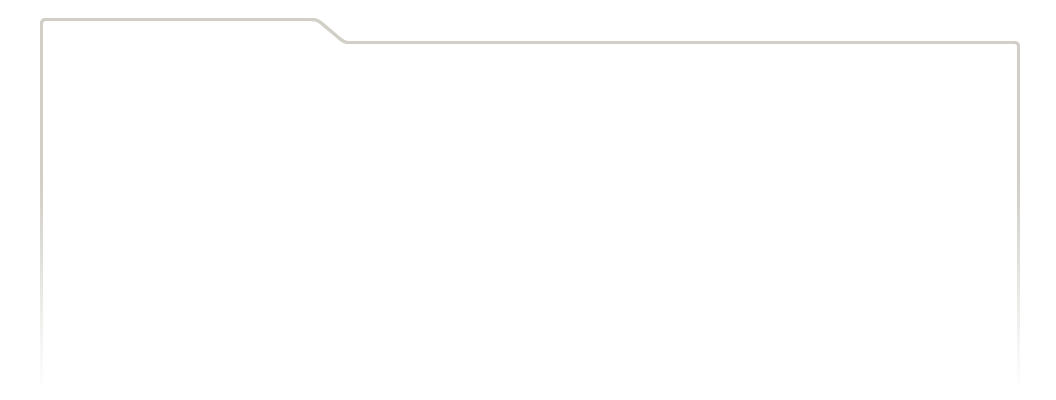
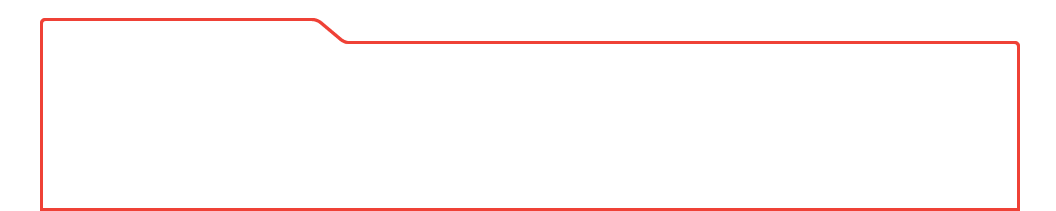
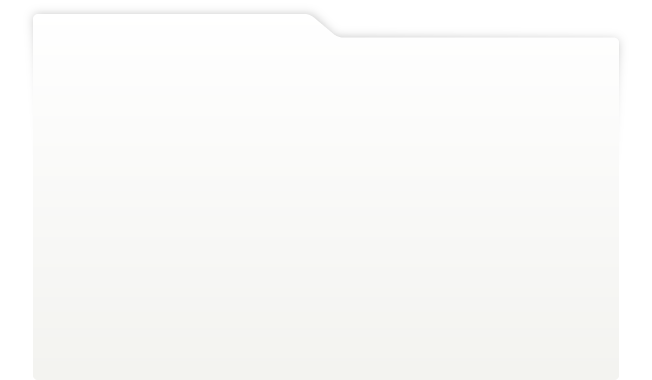
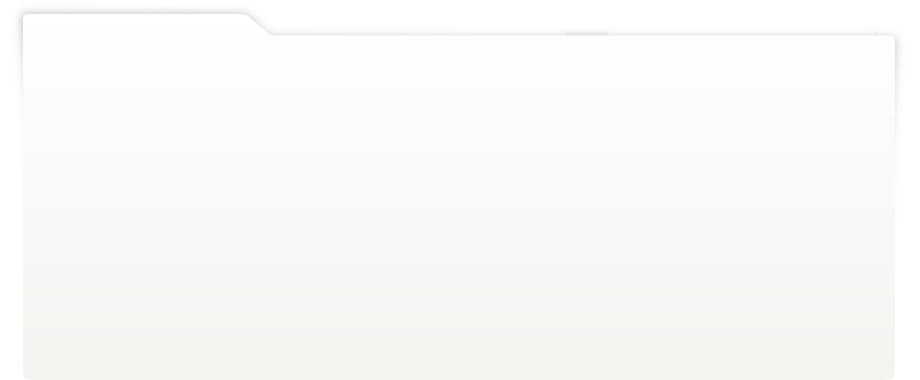
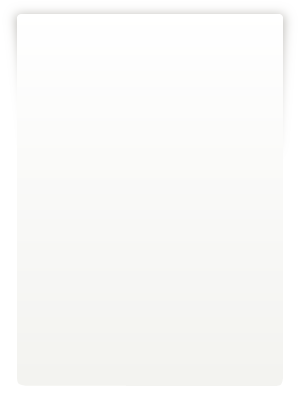
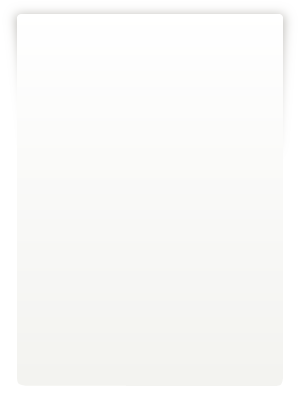
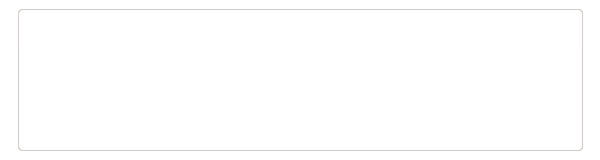
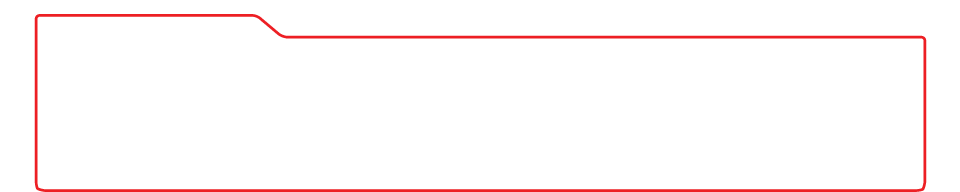
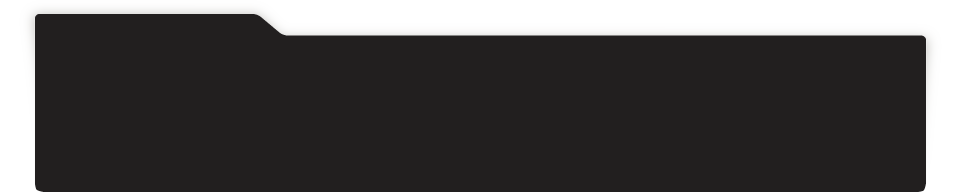
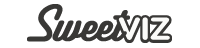
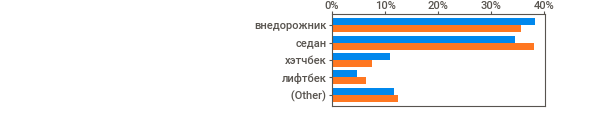
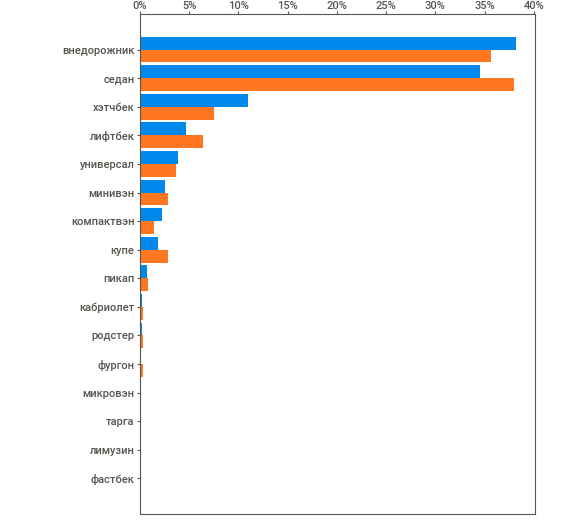
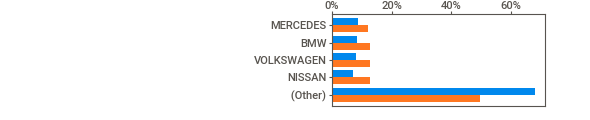
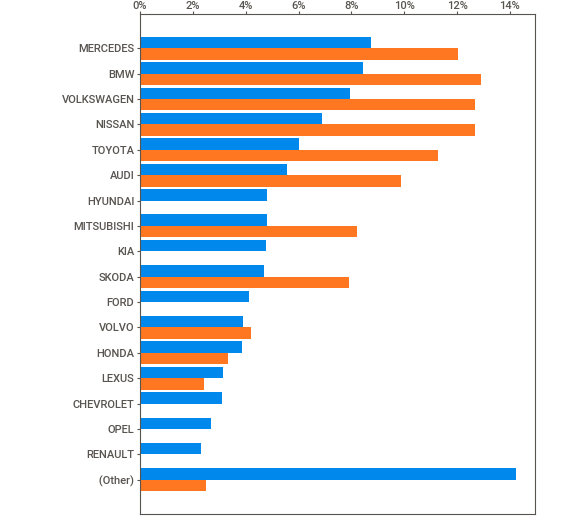
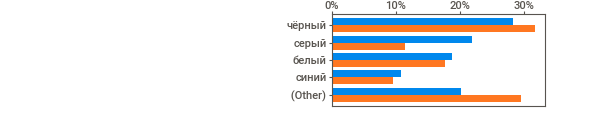
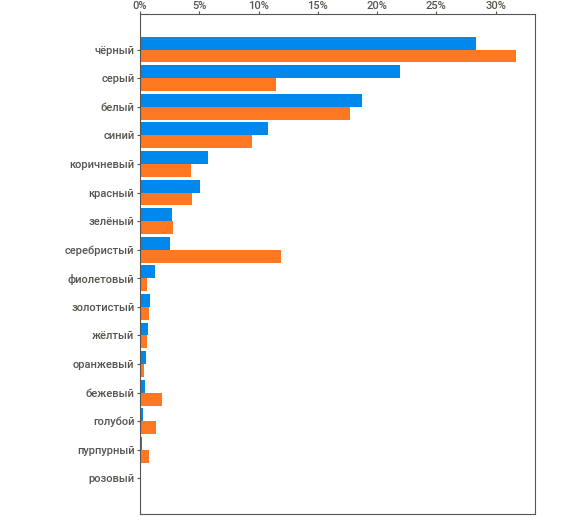
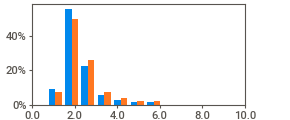
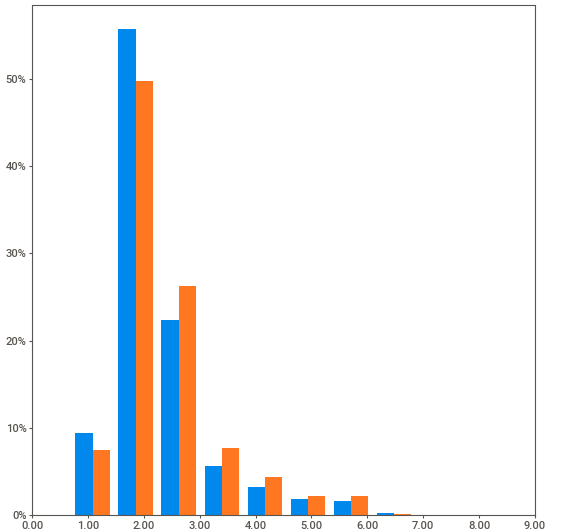
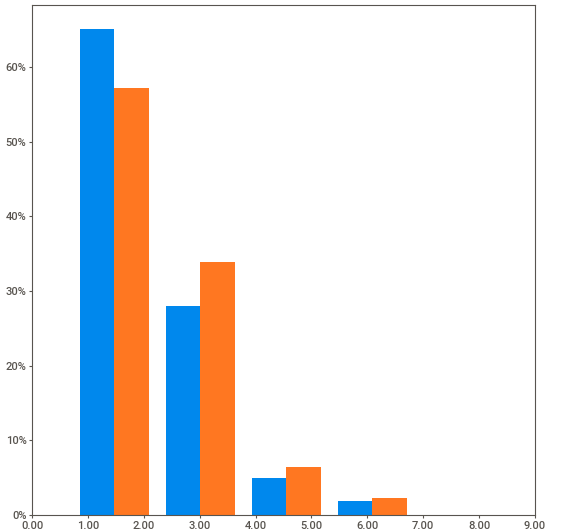
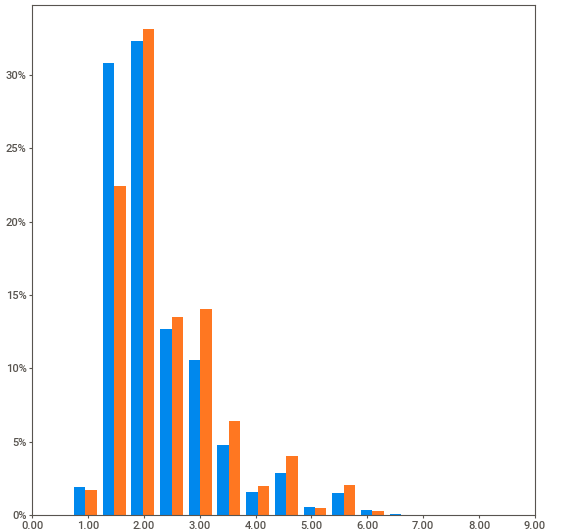
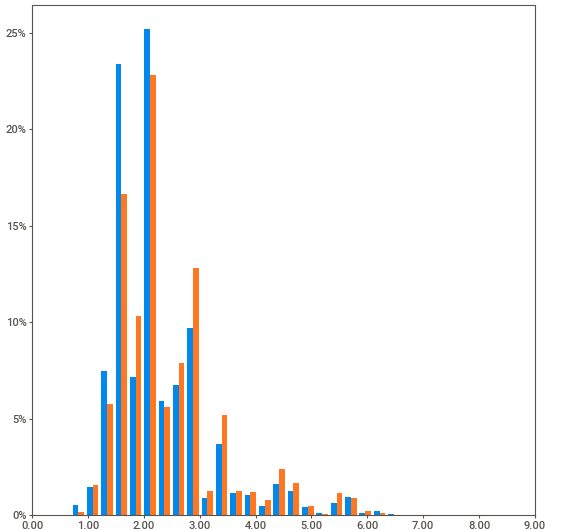
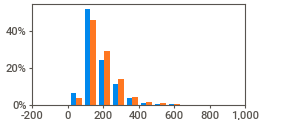
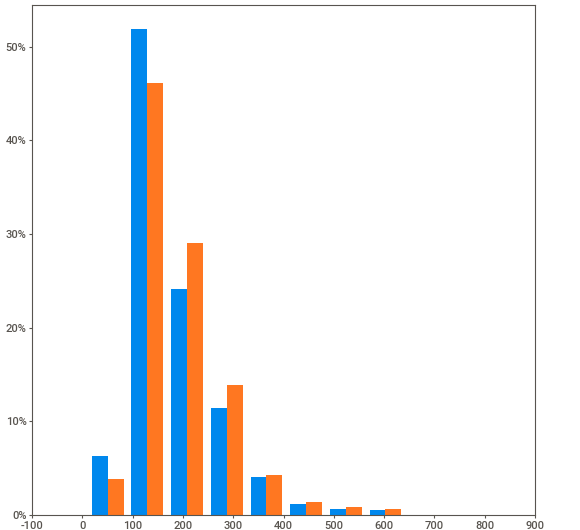
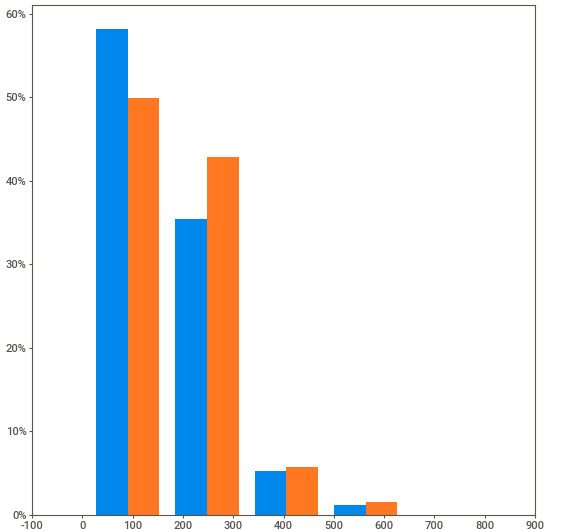
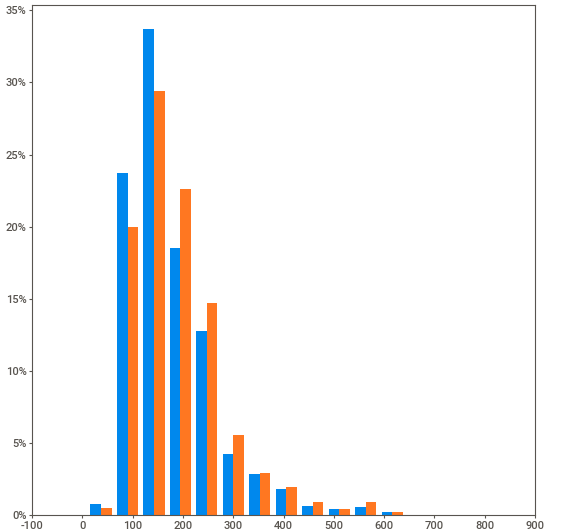
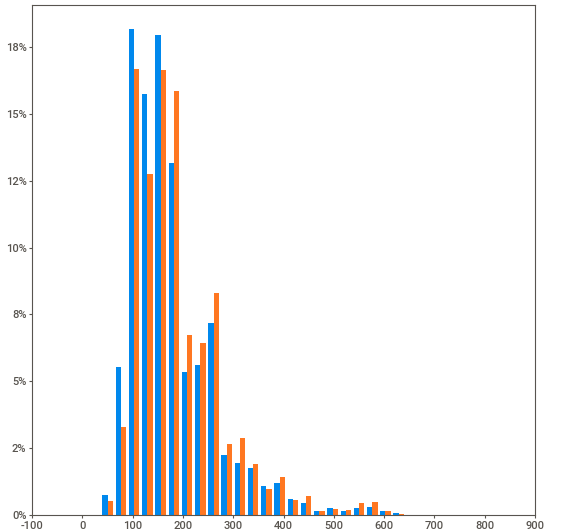
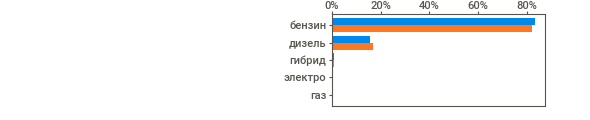
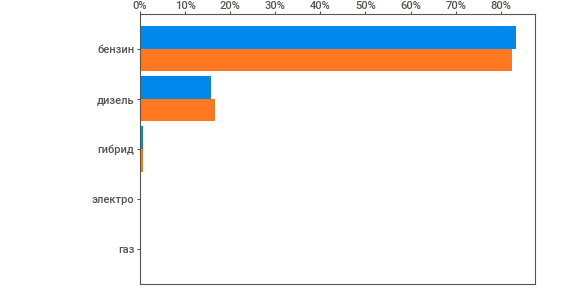
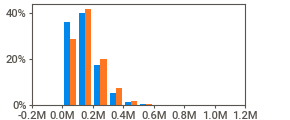
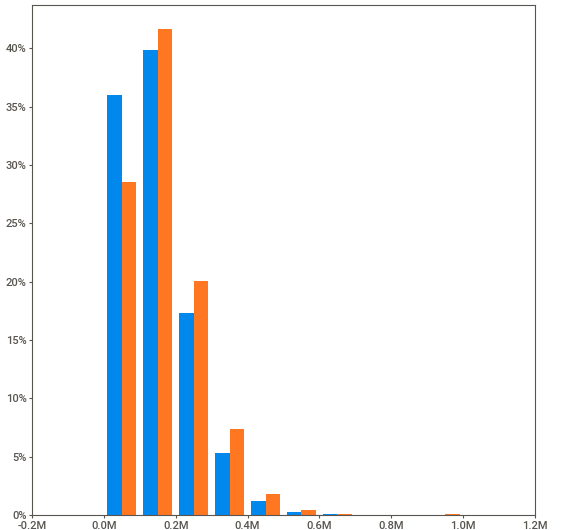
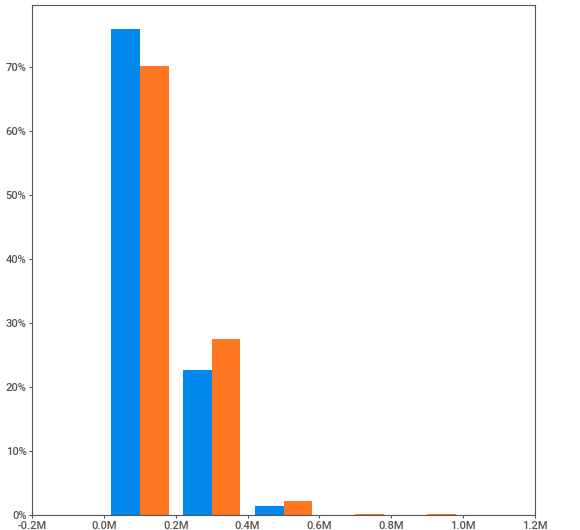
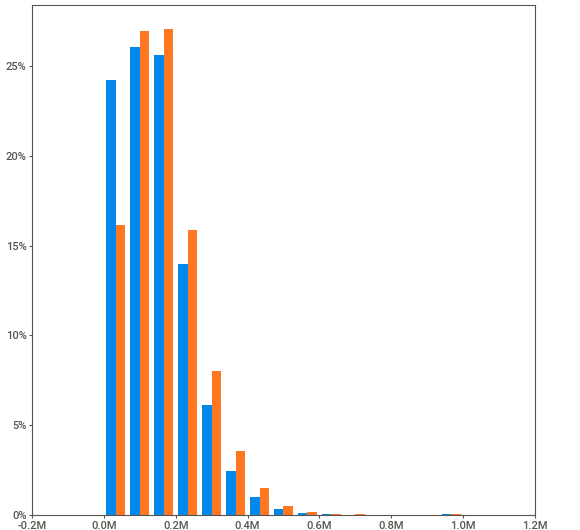
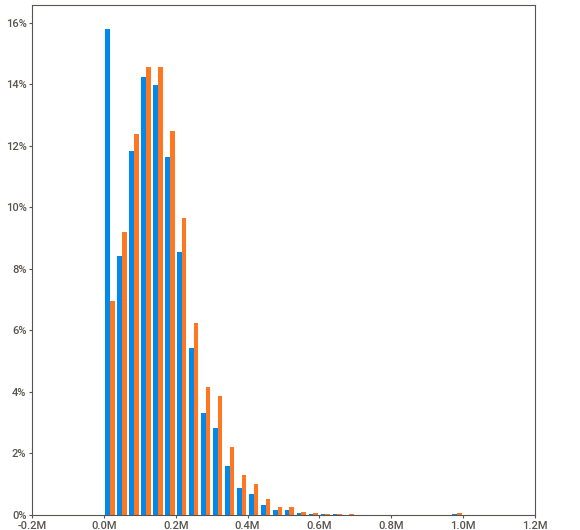
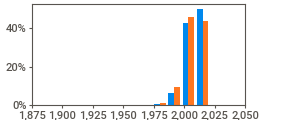
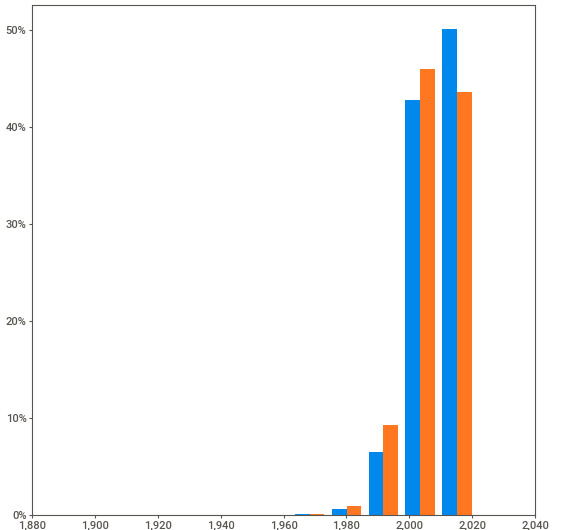
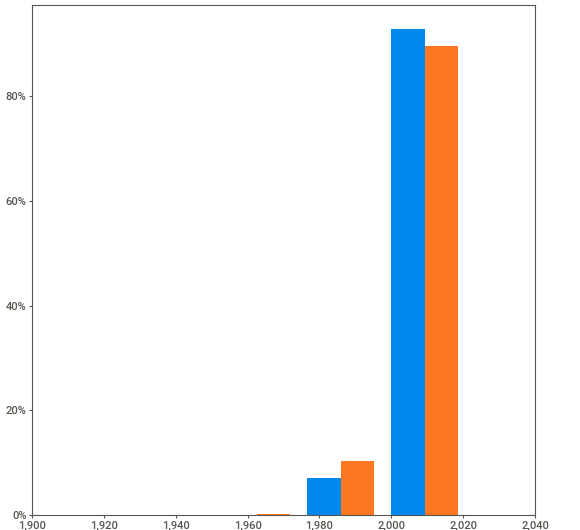
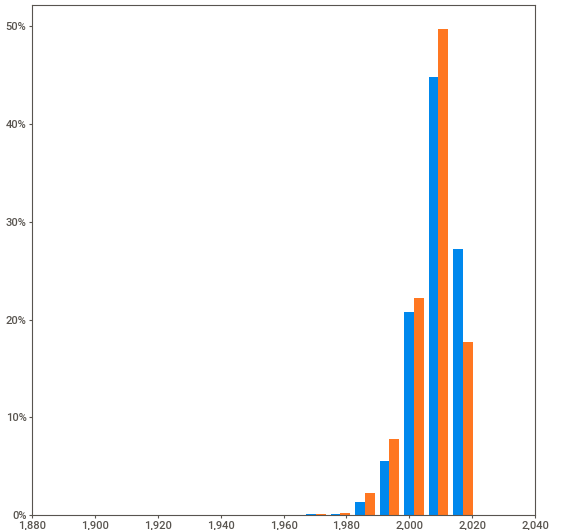
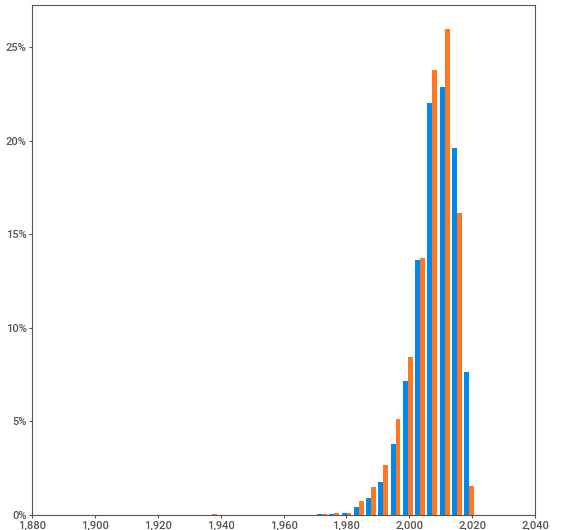
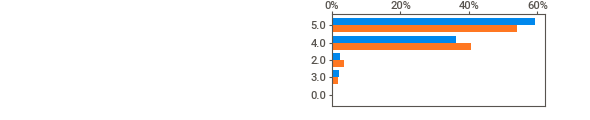
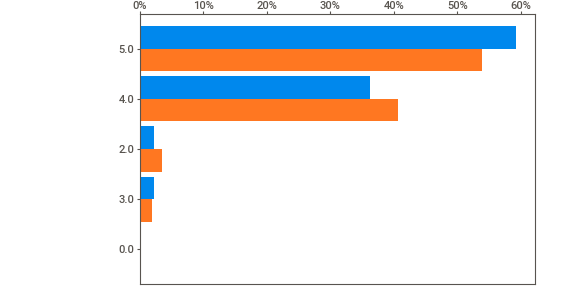
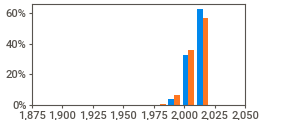
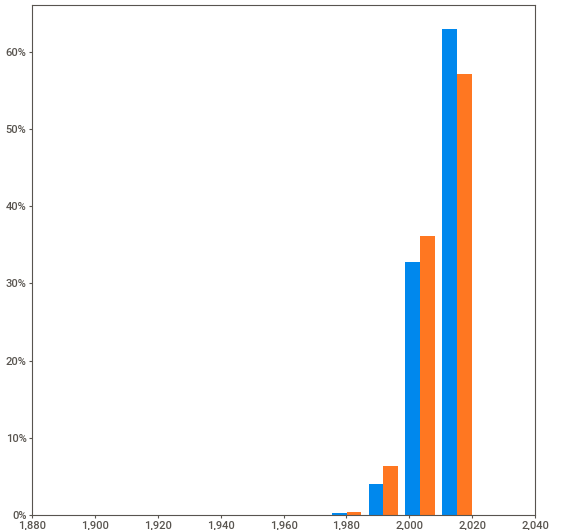
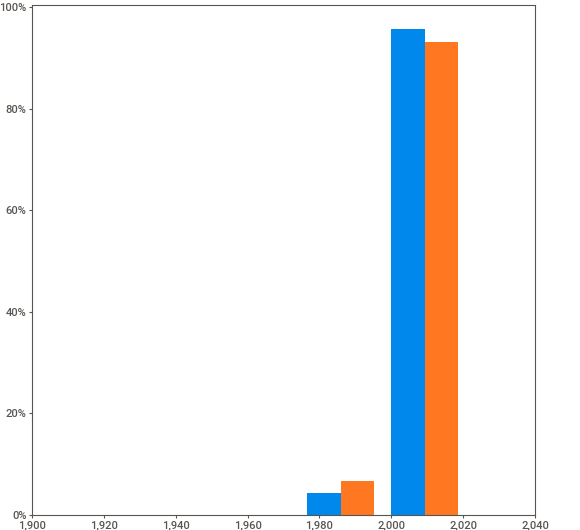
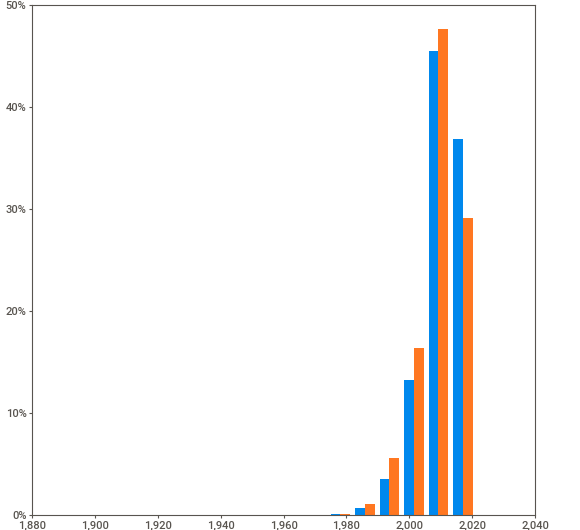
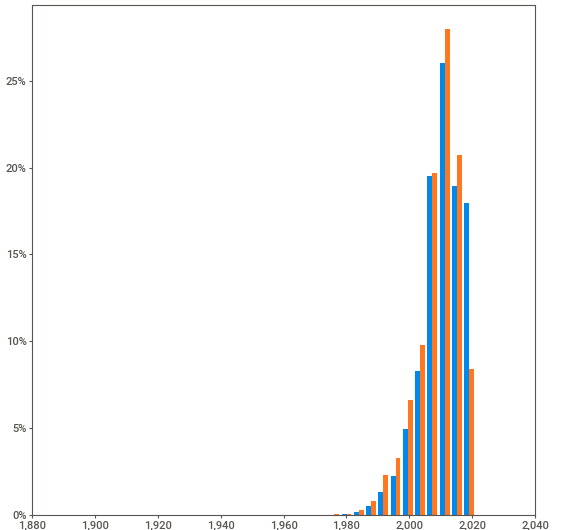
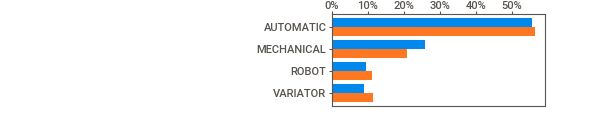
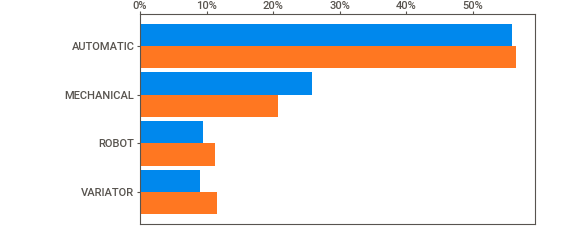
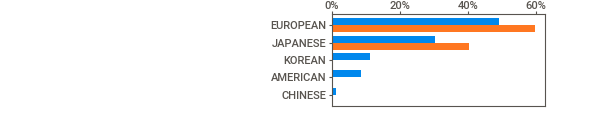
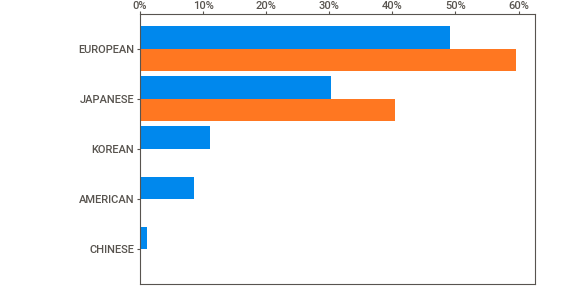
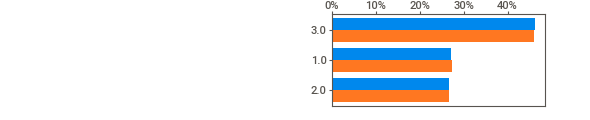
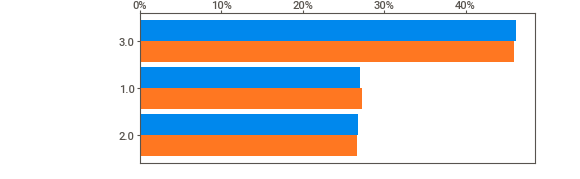
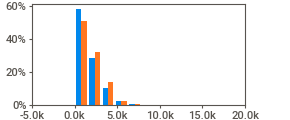
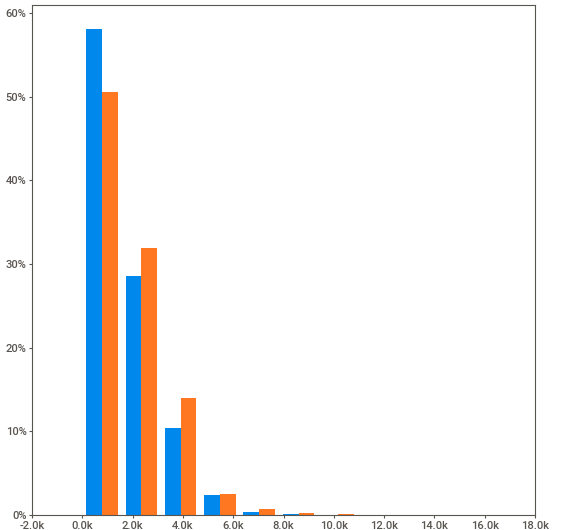
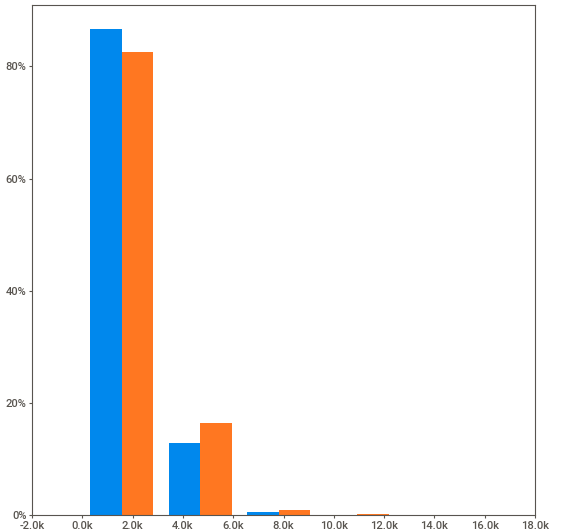
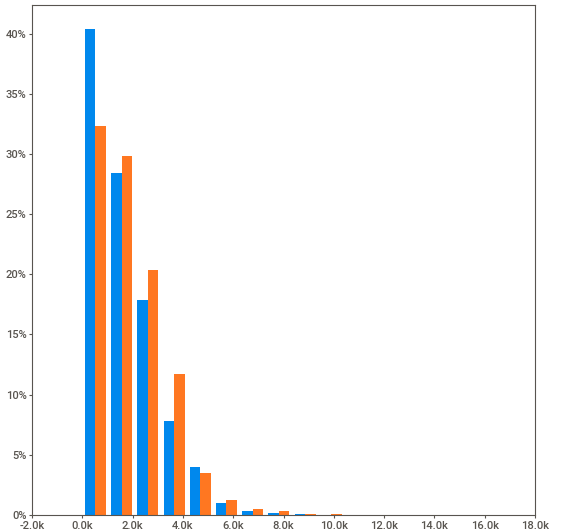
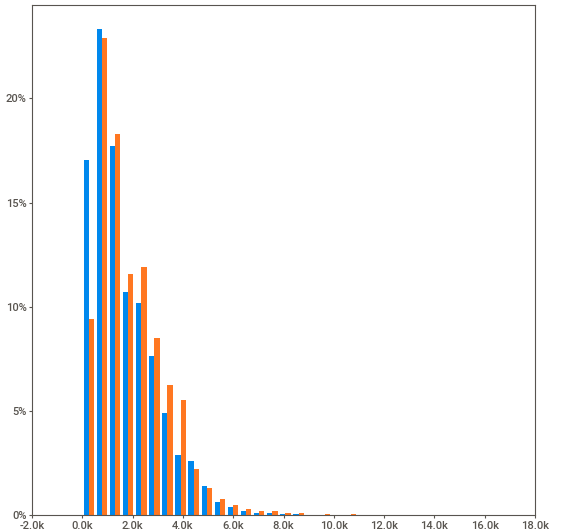
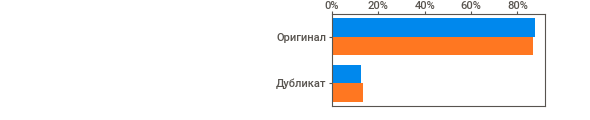
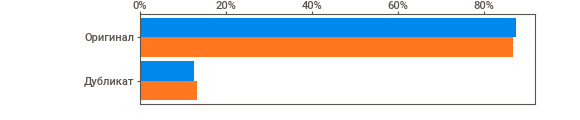
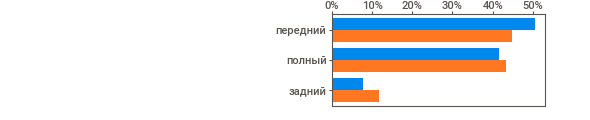
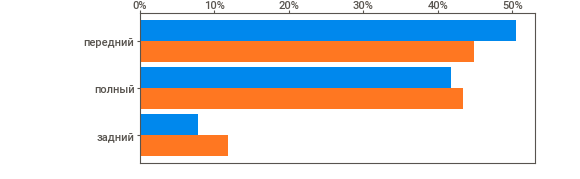
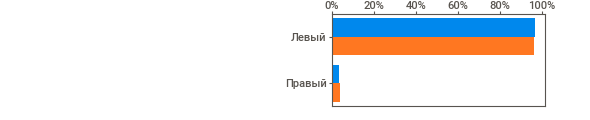
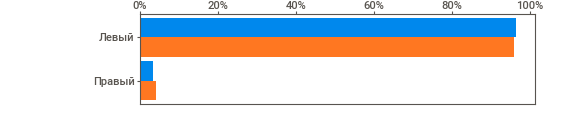
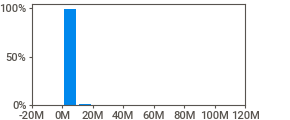
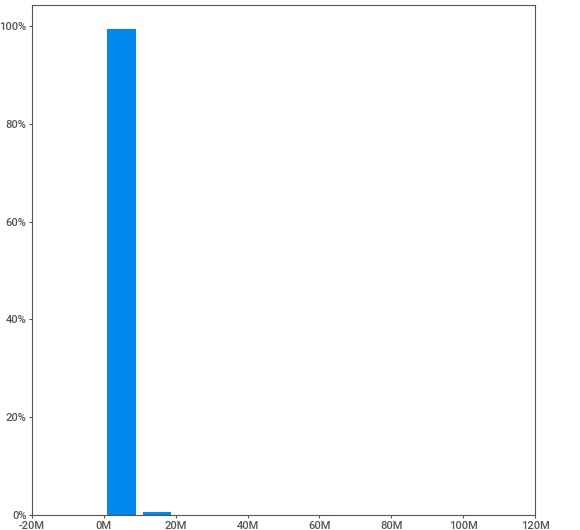
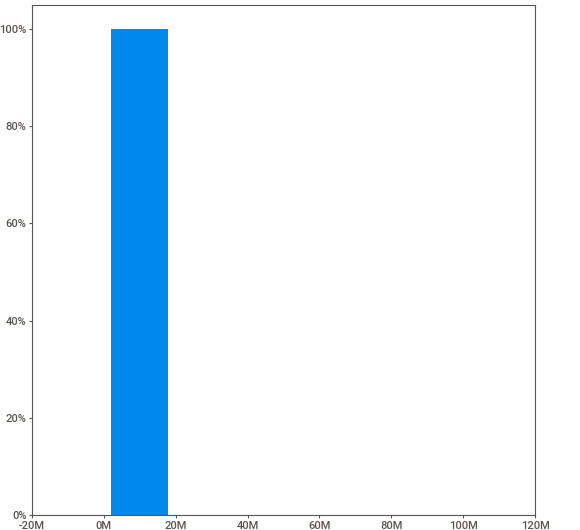
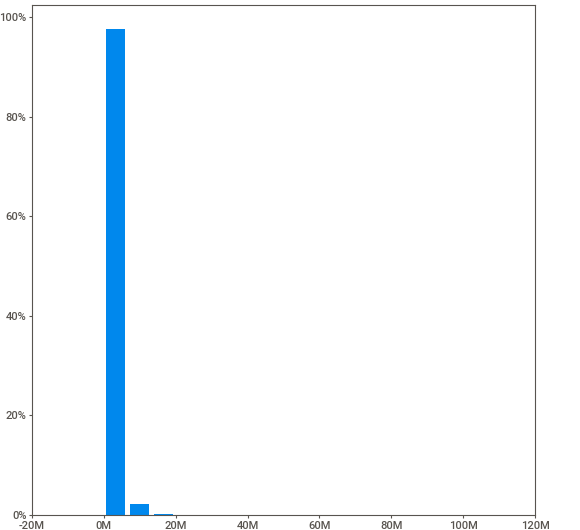
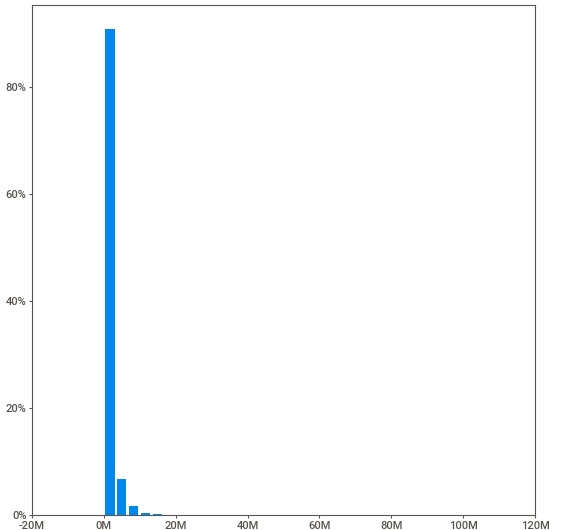
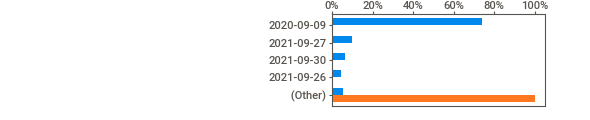
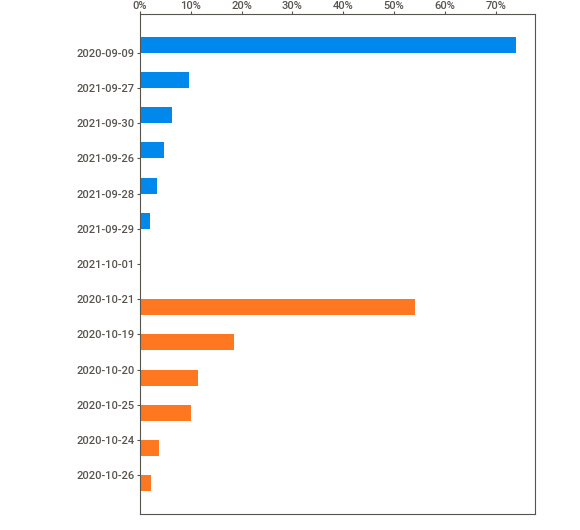
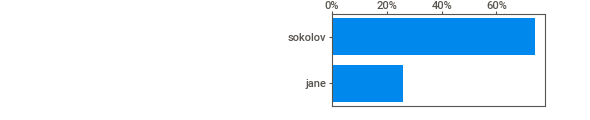
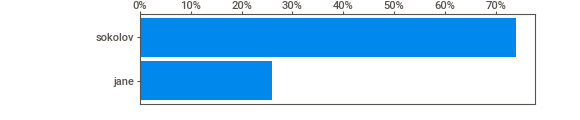
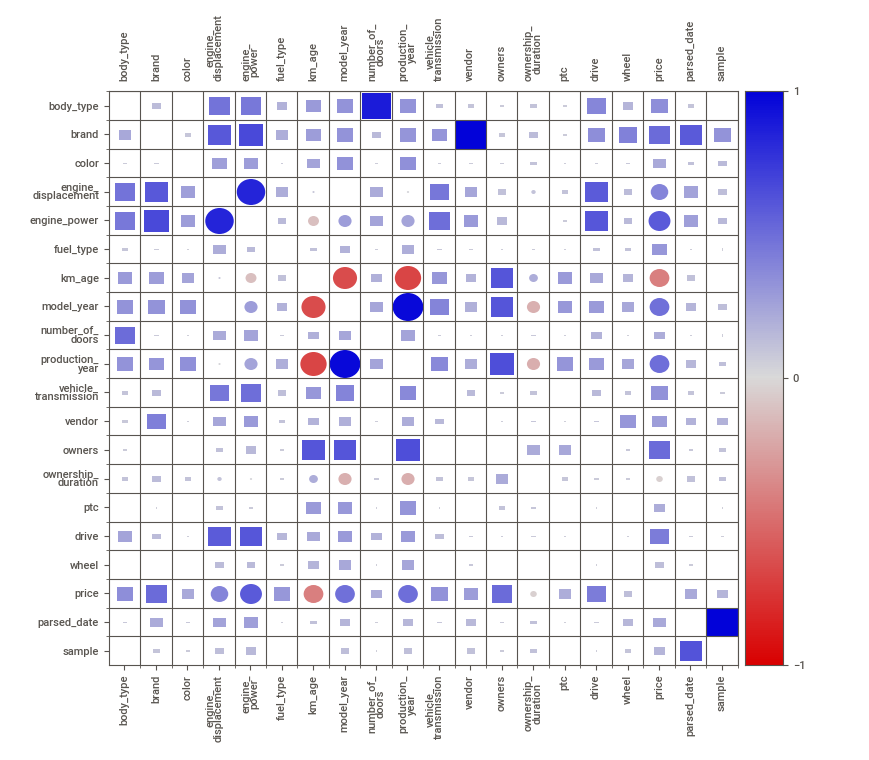
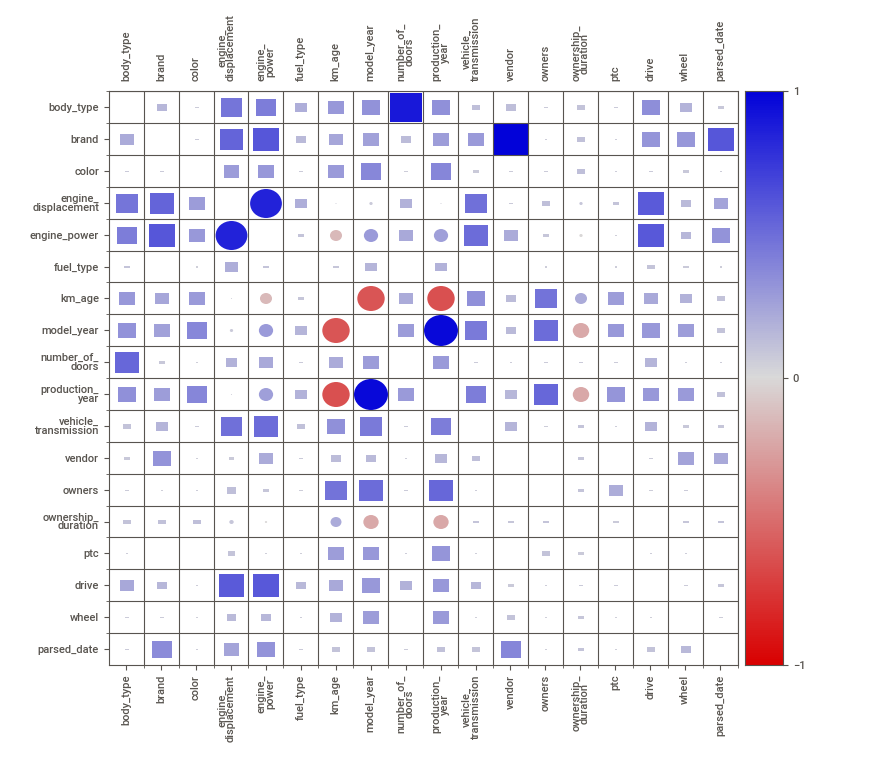

In [23]:
comp.show_notebook()

## Teatures TO DO

- **body_type** - fill na
- **brand** - 
- **color** - 
- **description** - 
- **engine_displacement** - 
- **engine_power** - 
- **fuel_type** - 
- **km_age** - 
- **model_year** - 
- **number_of_doors** - 
- **production_year** - 
- **vehicle_transmission** - 
- **vendor** - 
- **oweners** - 
- **owenership_duration** - 
- **ptc** - 
- **drive** - 
- **wheel** - 
- **price** - 

In [24]:
train.loc[train.body_type.isna()]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


In [25]:
train.body_type.value_counts(dropna=False)

внедорожник    44065
седан          39812
хэтчбек        12606
лифтбек         5358
универсал       4489
минивэн         2947
компактвэн      2552
купе            2064
пикап            794
кабриолет        242
родстер          191
фургон           174
микровэн          54
тарга              9
лимузин            7
фастбек            3
Name: body_type, dtype: int64

In [26]:
test.body_type.value_counts(dropna=False)

седан          13165
внедорожник    12346
хэтчбек         2609
лифтбек         2232
универсал       1276
минивэн          995
купе             982
компактвэн       489
пикап            290
родстер           99
фургон            97
кабриолет         90
микровэн           7
лимузин            6
тарга              2
фастбек            1
Name: body_type, dtype: int64

#### 2 rows we can drop (they are informless)

In [27]:
train.loc[(train.km_age.isna()) & (train['production_year'] <= 2020.1)]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


## My opinion - it's new cars. We can fill NaNs by 0 or random (20-50 km)

In [159]:
electro_mask = (train.engine_displacement.isna()) & (train.fuel_type == 'электро')
train.loc[electro_mask, 'engine_displacement'] = 0

## So it's electro cars. We can fill NaNs by 0

In [29]:
train.loc[train.owners.isna()][['parsed_date', 'production_year']].value_counts()

parsed_date  production_year
2020-09-09   2020.0             9537
             2019.0              916
             2018.0               81
             2017.0                1
dtype: int64

In [160]:
train['parsed_date'] = pd.to_datetime(train['parsed_date'])
train['production_year'] = pd.to_datetime(train['production_year'].astype(int).astype(str))

In [161]:
train['diff_data'] = (train['parsed_date'] - train['production_year']).astype('timedelta64[D]')

In [162]:
train['diff_data_years'] = train['diff_data'] / 365

In [163]:
age_mask1 = train['diff_data_years'] >= 60
age_mask2 = train['diff_data_years'].between(20, 60, inclusive='left')
age_mask3 = train['diff_data_years'].between(10, 20, inclusive='left')
age_mask4 = train['diff_data_years'].between(5, 10, inclusive='left')
age_mask5 = train['diff_data_years'].between(3, 5, inclusive='left')
age_mask6 = train['diff_data_years'] < 3

train.loc[age_mask1, 'age_cat'] = 'retro'
train.loc[age_mask2, 'age_cat'] = 'old'
train.loc[age_mask3, 'age_cat'] = 'med'
train.loc[age_mask4, 'age_cat'] = 'not_bad'
train.loc[age_mask5, 'age_cat'] = 'may_be_on_garant'
train.loc[age_mask6, 'age_cat'] = 'almost_new'

In [164]:
train['retro'] = (train['diff_data_years'] >= 60).astype(int)
train['most_wanted'] = (train['diff_data_years'] <= 3).astype(int)
train['good_cond'] = (train['diff_data_years'].between(3, 5, inclusive='right')).astype(int)

In [222]:
train['age_cat'].value_counts()

med                 40923
not_bad             36147
almost_new          18374
may_be_on_garant    10541
old                  9284
retro                  98
Name: age_cat, dtype: int64

In [165]:
train['km_per_year'] = train['km_age'] / train['diff_data_years']

In [177]:
# vol_mask1 = train['engine_displacement'] <= 1.1
# vol_mask2 = train['engine_displacement'].between(1.1, 1.8, inclusive='right')
# vol_mask3 = train['engine_displacement'].between(1.8, 3.5, inclusive='right')
# vol_mask4 = train['engine_displacement'] > 3.5

# train.loc[vol_mask1, 'vol_cat'] = 'micro'
# train.loc[vol_mask2, 'vol_cat'] = 'mini'
# train.loc[vol_mask3, 'vol_cat'] = 'medium'
# train.loc[vol_mask4, 'vol_cat'] = 'fuel_eater'

In [178]:
# train['vol_cat'].value_counts()

medium        60483
mini          44656
fuel_eater     9217
micro          1011
Name: vol_cat, dtype: int64

In [166]:
train['production_year'] = train['production_year'].dt.year

In [35]:
train.loc[train.owners.isna()][['diff_data']].value_counts()

diff_data
252.0        9537
617.0         916
982.0          81
1347.0          1
dtype: int64

In [167]:
mask1 = train['diff_data'] < 365
mask2 = train['diff_data'].between(365, 730)
mask3 = train['diff_data'] >= 730
train.loc[mask1, 'owners'] = 1
train.loc[mask2, 'owners'] = 2
train.loc[mask3, 'owners'] = 3

In [149]:
def fillna_owners(s):
    if not pd.isna(s[0]):
        return s[0]
    else:
        if s[1] < 365:
            return 1
        elif 365 <= x[1] < 730:
            return 2
        else:
            return 3

In [173]:
train['owners'] = train[['owners', 'diff_data']].apply(fillna_owners, axis=1)

### Fill NaN's in description

In [177]:
mask_descr = train['description'].isna()
train.loc[mask_descr, 'description'] = 'No description'

In [178]:
train['desc_count'] = train['description'].str.split().str.len()

In [82]:
# for col in ['body_type','brand', 'color', 'model_name', 'fuel_type', 'vehicle_transmission', 'vendor', 'drive', 'wheel', 'age_cat']:
#     train[col] = train[col].astype('category').cat.codes

### Fix Jane Price

In [179]:
train[train['sample'] == 'jane']['price'] = train['price'] * 0.86

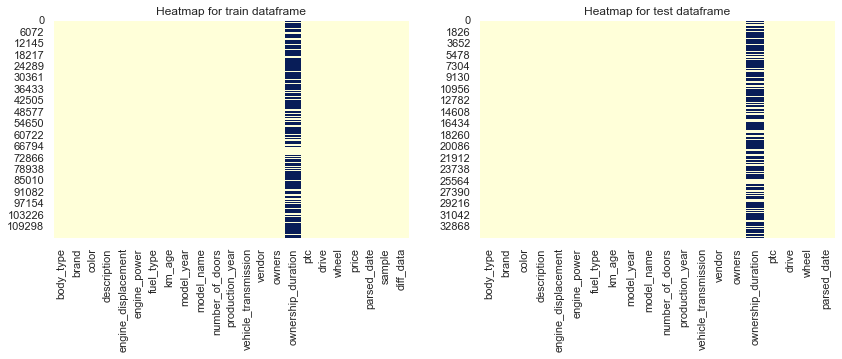

In [39]:
plot_nans_heatmap(train, test)

## removing cols

In [180]:
# del train["model_name"]
# del test["model_name"]
del train["ownership_duration"]
del test["ownership_duration"]

## notes, next steps

1. fill na
   - owners
2. feature engeneering
   - parced_year - production_year
3. price multiply * 0.86 for jane only
4. numerize cats
5. standartize nums

## preparing to simple model

In [166]:
train.dtypes

body_type                       object
brand                           object
color                           object
description                     object
engine_displacement            float64
engine_power                   float32
fuel_type                       object
km_age                         float32
model_year                     float32
model_name                      object
number_of_doors                  int32
production_year                  int64
vehicle_transmission            object
vendor                          object
owners                           int32
ptc                             object
drive                           object
wheel                           object
price                          float64
parsed_date             datetime64[ns]
sample                          object
diff_data                      float64
diff_data_years                  int32
age_cat                         object
dtype: object

In [39]:
test.dtypes

body_type                object
brand                    object
color                    object
description              object
engine_displacement     float64
engine_power            float32
fuel_type                object
km_age                  float32
model_year              float32
model_name               object
number_of_doors         float32
production_year         float32
vehicle_transmission     object
vendor                   object
owners                  float32
ptc                      object
drive                    object
wheel                    object
parsed_date              object
dtype: object

In [40]:
def dumb_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    return pd.get_dummies(df, columns=df.select_dtypes("object").columns.tolist())

In [41]:
dumb_preprocessing(test).sample(5, random_state=42).T

,19026,3337,11807,18661,11783
engine_displacement,2.0,1.8,2.0,1.8,2.0
engine_power,150.0,125.0,141.0,184.0,141.0
km_age,121490.0,240000.0,104842.0,68000.0,170000.0
model_year,2000.0,1994.0,2010.0,2009.0,2010.0
number_of_doors,5.0,4.0,5.0,2.0,5.0
...,...,...,...,...,...
parsed_date_2020-10-20,0.0,0.0,0.0,0.0,0.0
parsed_date_2020-10-21,1.0,0.0,1.0,1.0,1.0
parsed_date_2020-10-24,0.0,0.0,0.0,0.0,0.0
parsed_date_2020-10-25,0.0,0.0,0.0,0.0,0.0


In [181]:
train['number_of_doors'] = train['number_of_doors'].astype('int')

In [182]:
train['owners'] = train['owners'].astype('int')

In [125]:
data.dtypes

body_type                       object
brand                           object
color                           object
description                     object
engine_displacement            float64
engine_power                   float32
fuel_type                       object
km_age                         float32
model_year                     float32
model_name                      object
number_of_doors                  int32
production_year                  int64
vehicle_transmission            object
vendor                          object
owners                           int32
ptc                             object
drive                           object
wheel                           object
price                          float64
parsed_date             datetime64[ns]
sample                          object
diff_data                      float64
dtype: object

In [191]:
data = train.copy()

In [192]:
for col in ['engine_displacement', 'engine_power', 'km_age', 'model_year', 'production_year', 'diff_data', 'km_per_year', 'desc_count']:
    data[col] = np.log2(data[col] + 1)

In [193]:
X = data.drop(['sample', 'price', 'parsed_date', 'description', 'ptc', 'diff_data_years'], axis=1)
y = data['price']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [195]:
X_train.sample(5)

,body_type,brand,color,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,drive,wheel,diff_data,age_cat,retro,most_wanted,good_cond,km_per_year,desc_count
18809,внедорожник,MERCEDES,серый,2.700440,8.603626,бензин,16.931580,10.970825,GL_KLASSE,5,10.971544,AUTOMATIC,EUROPEAN,3,полный,Левый,12.394731,med,0,0,0,13.049029,6.169925
95621,внедорожник,TOYOTA,серый,1.584963,7.238405,бензин,17.609648,10.966505,RAV_4,5,10.967226,MECHANICAL,JAPANESE,3,полный,Левый,12.812177,med,0,0,0,13.309559,6.228819
85427,внедорожник,RENAULT,серый,1.584963,7.169925,бензин,0.000000,10.977995,KAPTUR,5,10.980854,AUTOMATIC,EUROPEAN,1,полный,Левый,7.982994,almost_new,0,1,0,0.000000,9.108524
56780,внедорожник,HYUNDAI,коричневый,1.678072,7.651052,дизель,15.988174,10.977280,SANTA_FE,5,10.977995,AUTOMATIC,KOREAN,3,полный,Левый,10.743151,may_be_on_garant,0,0,1,13.757699,3.584963
19924,внедорожник,MERCEDES,серый,2.000000,7.965784,дизель,15.609670,10.977280,GLS,5,10.979425,AUTOMATIC,EUROPEAN,3,полный,Левый,10.416798,may_be_on_garant,0,0,1,13.705759,5.169925


In [200]:
model = CatBoostRegressor(iterations = 1000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          one_hot_max_size=31,
                          depth=12, l2_leaf_reg=12, learning_rate= 0.11
                         )
cat_features_index = [0, 1, 2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20]

In [201]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features_index,
          verbose_eval=0, use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [209]:
valid_pool = Pool(X_train, y_train, cat_features=cat_features_index)
feat = pd.DataFrame({'feature_imporance': model.get_feature_importance(valid_pool),
                      'feature_names': X_train.columns}).sort_values(by=['feature_imporance'], ascending=False)

<AxesSubplot:ylabel='feature_names'>

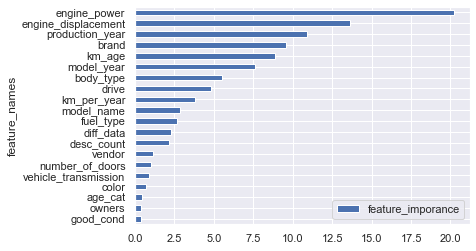

In [211]:
feat[:20].sort_values(by=['feature_imporance'], ascending=True).plot.barh(x='feature_names', y='feature_imporance')

In [134]:
predict_test = model.predict(X_test)

In [103]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [135]:
mape(y_test, predict_test)*100

14.931552014420715

In [74]:
X_obj = X.select_dtypes(include=['object']).copy()

In [82]:
X_cats_labeled

,intercept,body_type_0,body_type_1,body_type_2,body_type_3,body_type_4,body_type_5,body_type_6,body_type_7,body_type_8,body_type_9,body_type_10,body_type_11,body_type_12,body_type_13,body_type_14,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_30,brand_31,brand_32,brand_33,...,model_name_1125,model_name_1126,model_name_1127,model_name_1128,model_name_1129,model_name_1130,model_name_1131,model_name_1132,model_name_1133,model_name_1134,model_name_1135,model_name_1136,model_name_1137,model_name_1138,model_name_1139,model_name_1140,model_name_1141,model_name_1142,model_name_1143,model_name_1144,model_name_1145,model_name_1146,model_name_1147,model_name_1148,model_name_1149,model_name_1150,model_name_1151,model_name_1152,model_name_1153,model_name_1154,model_name_1155,model_name_1156,model_name_1157,model_name_1158,model_name_1159,model_name_1160,model_name_1161,model_name_1162,model_name_1163,model_name_1164,vehicle_transmission_0,vehicle_transmission_1,vehicle_transmission_2,vendor_0,vendor_1,vendor_2,vendor_3,drive_0,drive_1,wheel_0
0,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.972222,-0.944444,-0.916667,-0.888889,-0.861111,-0.833333,-0.805556,-0.777778,-0.75,-0.722222,-0.694444,-0.666667,-0.638889,-0.611111,-0.583333,-0.555556,-0.527778,-0.5,-0.472222,-0.444444,-0.416667,-0.388889,-0.361111,-0.333333,-0.305556,-0.277778,-0.25,-0.222222,-0.194444,-0.166667,-0.138889,-0.111111,-0.083333,-0.055556,...,-0.034305,-0.033448,-0.03259,-0.031732,-0.030875,-0.030017,-0.02916,-0.028302,-0.027444,-0.026587,-0.025729,-0.024871,-0.024014,-0.023156,-0.022298,-0.021441,-0.020583,-0.019726,-0.018868,-0.01801,-0.017153,-0.016295,-0.015437,-0.01458,-0.013722,-0.012864,-0.012007,-0.011149,-0.010292,-0.009434,-0.008576,-0.007719,-0.006861,-0.006003,-0.005146,-0.004288,-0.003431,-0.002573,-0.001715,-0.000858,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.5
1,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.972222,-0.944444,-0.916667,-0.888889,-0.861111,-0.833333,-0.805556,-0.777778,-0.75,-0.722222,-0.694444,-0.666667,-0.638889,-0.611111,-0.583333,-0.555556,-0.527778,-0.5,-0.472222,-0.444444,-0.416667,-0.388889,-0.361111,-0.333333,-0.305556,-0.277778,-0.25,-0.222222,-0.194444,-0.166667,-0.138889,-0.111111,-0.083333,-0.055556,...,-0.034305,-0.033448,-0.03259,-0.031732,-0.030875,-0.030017,-0.02916,-0.028302,-0.027444,-0.026587,-0.025729,-0.024871,-0.024014,-0.023156,-0.022298,-0.021441,-0.020583,-0.019726,-0.018868,-0.01801,-0.017153,-0.016295,-0.015437,-0.01458,-0.013722,-0.012864,-0.012007,-0.011149,-0.010292,-0.009434,-0.008576,-0.007719,-0.006861,-0.006003,-0.005146,-0.004288,-0.003431,-0.002573,-0.001715,-0.000858,0.25,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.5
2,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.972222,-0.944444,-0.916667,-0.888889,-0.861111,-0.833333,-0.805556,-0.777778,-0.75,-0.722222,-0.694444,-0.666667,-0.638889,-0.611111,-0.583333,-0.555556,-0.527778,-0.5,-0.472222,-0.444444,-0.416667,-0.388889,-0.361111,-0.333333,-0.305556,-0.277778,-0.25,-0.222222,-0.194444,-0.166667,-0.138889,-0.111111,-0.083333,-0.055556,...,-0.034305,-0.033448,-0.03259,-0.031732,-0.030875,-0.030017,-0.02916,-0.028302,-0.027444,-0.026587,-0.025729,-0.024871,-0.024014,-0.023156,-0.022298,-0.021441,-0.020583,-0.019726,-0.018868,-0.01801,-0.017153,-0.016295,-0.015437,-0.01458,-0.013722,-0.012864,-0.012007,-0.011149,-0.010292,-0.009434,-0.008576,-0.007719,-0.006861,-0.006003,-0.005146,-0.004288,-0.003431,-0.002573,-0.001715,-0.000858,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.5
3,1,-0.9375,-0.875,-0.8125,-0.

In [75]:
encoder = ce.BackwardDifferenceEncoder(cols=X_obj.columns)

In [76]:
X_cats_labeled = encoder.fit_transform(X_obj, verbose=1)

In [80]:
X_train_cats_labeled, X_test, y_train_cats_labeled, y_test = train_test_split(X_cats_labeled, y, test_size=0.20, random_state=42)

In [99]:
model_xbr = xgb.XGBRegressor(max_depth=20, min_child_weight=1, n_estimators=500, n_jobs=-1, eta=0.11)

In [100]:
model_xbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.11, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.109999999,
             max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
y_pred_xbr = model_xbr.predict(X_test)

In [104]:
mape(y_test, y_pred_xbr)*100

14.209271341992268

In [106]:
model_rfr = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)

In [107]:
model_rfr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [108]:
y_pred_rfr = model_rfr.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.2s finished


In [109]:
mape(y_test, y_pred_rfr)*100

14.334875944067726

In [117]:
model_ada = AdaBoostRegressor(random_state=42)

In [118]:
model_ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [119]:
y_pred_ada = model_ada.predict(X_test)

In [120]:
mape(y_test, y_pred_ada)*100

639.890411123395